In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# reading data as pandas dataframe
application = pd.read_csv('application_record.csv')
credit = pd.read_csv('credit_record.csv')

In [3]:
# lets look at our application data
application.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [4]:
# lets look at our credit data
credit.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [5]:
# lets get some info about our data: like the data types, nulls, total counts
application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

In [6]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


In [7]:
# lets get value counts and the count of unique observations in each column
for col in application.columns:
    print(col)
    print(application[col].value_counts())
    print(f'the number of unique observation for the col is: {application[col].nunique()}')
    print()

ID
7603224    2
7742853    2
7836711    2
7091721    2
7022327    2
          ..
5372264    1
6412652    1
6410605    1
6367602    1
6291456    1
Name: ID, Length: 438510, dtype: int64
the number of unique observation for the col is: 438510

CODE_GENDER
F    294440
M    144117
Name: CODE_GENDER, dtype: int64
the number of unique observation for the col is: 2

FLAG_OWN_CAR
N    275459
Y    163098
Name: FLAG_OWN_CAR, dtype: int64
the number of unique observation for the col is: 2

FLAG_OWN_REALTY
Y    304074
N    134483
Name: FLAG_OWN_REALTY, dtype: int64
the number of unique observation for the col is: 2

CNT_CHILDREN
0     304071
1      88527
2      39884
3       5430
4        486
5        133
7          9
9          5
12         4
6          4
14         3
19         1
Name: CNT_CHILDREN, dtype: int64
the number of unique observation for the col is: 12

AMT_INCOME_TOTAL
135000.0    46879
157500.0    39768
180000.0    37912
112500.0    36979
225000.0    34130
            ...  
300600.0

In [8]:
# lets get value counts and the count of unique observations in each column
for col in credit.columns:
    print(col)
    print(credit[col].value_counts())
    print(f'the number of unique observation for the col is: {credit[col].nunique()}')
    print()

ID
5145767    61
5116236    61
5037153    61
5002523    61
5028973    61
           ..
5149044     1
5079047     1
5137258     1
5023604     1
5023029     1
Name: ID, Length: 45985, dtype: int64
the number of unique observation for the col is: 45985

MONTHS_BALANCE
-1     34436
-2     34209
 0     33856
-3     33854
-4     33365
       ...  
-56     2109
-57     1649
-58     1255
-59      820
-60      415
Name: MONTHS_BALANCE, Length: 61, dtype: int64
the number of unique observation for the col is: 61

STATUS
C    442031
0    383120
X    209230
1     11090
5      1693
2       868
3       320
4       223
Name: STATUS, dtype: int64
the number of unique observation for the col is: 8



In [9]:
# creating  list of unique observations for both dataframes
unique_application_id = list(application.ID.unique())
unique_credit_id = list(credit.ID.unique())

In [51]:
len(unique_credit_id)

45985

In [52]:
# checking how many of the unique ids in application dataframe match the unique ids in credit dataframe

appication_and_credit = []
just_application= []
for val in unique_application_id:
    if val in unique_credit_id:
        appication_and_credit.append(val)
    else:
        just_application.append(val)

In [11]:
# IDs in both application and credit
# len(appication_and_credit)

In [12]:
# # IDs in just application
# len(just_application)

# Takeaways:
- there are 438510 unique  ids  in application dataframe
- there are 45985 unique ids in credit dataframe
- Out of 438510 unique ids in application dataframe, only 36457 of them have records of their credit activity


**Thought Process For Filtering the data:**
- There are 438510 unique ids in applicant data frame but there are only 45985 unique id in credit history dataframe
- When cross validated, only 36457 of the unique ids of the applicant dataframe have credit history. 
- So, lets create a dataframe of applicant whose id are in credit history data frame and filter the credit histroy dataframe to have just the history of these applicant
- Also, save a copy locally

In [13]:
# df = pd.DataFrame(columns = application.columns)
# for val in appication_and_credit:
#     df = df.append(application[application.ID == val])


In [14]:
# df.to_csv('applicant_with_credit.csv')

In [15]:
# test_df = pd.DataFrame(columns = application.columns)
# for val in just_application:
#     test_df = test_df.append(application[application.ID == val])

# test_df

In [16]:
# df = pd.DataFrame(columns = credit.columns)
# for val in appication_and_credit:
#     df = df.append(credit[credit.ID == val])

In [17]:
# df.to_csv('credit_for_unique_applicant.csv')

In [18]:
applicant = pd.read_csv('applicant_with_credit.csv', index_col = 0)
credit_hist = pd.read_csv('credit_for_unique_applicant.csv', index_col = 0)

In [19]:
# lets look at our data
applicant.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [20]:
# lets look at our data
credit_hist.head()

,ID,MONTHS_BALANCE,STATUS
92938,5008804,0,C
92939,5008804,-1,C
92940,5008804,-2,C
92941,5008804,-3,C
92942,5008804,-4,C


In [21]:
# lets lower case all of the column name

applicant.columns = [col.lower() for col in applicant.columns]

credit_hist.columns = [col.lower() for col in credit_hist.columns]

In [22]:
# lets get the null value count for applicant dataframe
applicant.isnull().sum()

id                         0
code_gender                0
flag_own_car               0
flag_own_realty            0
cnt_children               0
amt_income_total           0
name_income_type           0
name_education_type        0
name_family_status         0
name_housing_type          0
days_birth                 0
days_employed              0
flag_mobil                 0
flag_work_phone            0
flag_phone                 0
flag_email                 0
occupation_type        11323
cnt_fam_members            0
dtype: int64

In [23]:
# there is only one column with null value, lets check 

applicant.occupation_type.value_counts(dropna = False)

NaN                      11323
Laborers                  6211
Core staff                3591
Sales staff               3485
Managers                  3012
Drivers                   2138
High skill tech staff     1383
Accountants               1241
Medicine staff            1207
Cooking staff              655
Security staff             592
Cleaning staff             551
Private service staff      344
Low-skill Laborers         175
Waiters/barmen staff       174
Secretaries                151
HR staff                    85
Realty agents               79
IT staff                    60
Name: occupation_type, dtype: int64

In [24]:
# we see that there is another column named name_income_type, lets check what that is
applicant.name_income_type.value_counts()

Working                 18819
Commercial associate     8490
Pensioner                6152
State servant            2985
Student                    11
Name: name_income_type, dtype: int64

In [25]:
# lets groupby name_income_type and see the count of the occupation type
applicant.groupby(['occupation_type', 'name_income_type'])['id'].count()

occupation_type       name_income_type    
Accountants           Commercial associate    489
                      Pensioner                 1
                      State servant            92
                      Working                 659
Cleaning staff        Commercial associate    107
                                             ... 
Security staff        State servant            21
                      Working                 378
Waiters/barmen staff  Commercial associate     49
                      State servant            44
                      Working                  81
Name: id, Length: 62, dtype: int64

In [26]:
# lets derive some new columns that will give age of our applicant
applicant['age'] = round(applicant.days_birth/(-365))

In [27]:
# creating a new column which stores years of employment for a given applicant. If the days of employment is above 365, it rounds
# else it doesnt

applicant['employed_years'] = [round(val/(-365)) if val < -365 else val/(-365)  if val < 0 else round(val/365) for val in list(applicant.days_employed)]

In [28]:
# lets take a look at our data now
applicant.head()

,id,code_gender,flag_own_car,flag_own_realty,cnt_children,amt_income_total,name_income_type,name_education_type,name_family_status,name_housing_type,days_birth,days_employed,flag_mobil,flag_work_phone,flag_phone,flag_email,occupation_type,cnt_fam_members,age,employed_years
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,33.0,12.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,33.0,12.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,59.0,3.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,52.0,8.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,52.0,8.0


In [29]:
# lets look at our original dataframe
application.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [30]:
# lets see how many of the ids have been duplicated
(application.ID.value_counts() > 1).sum()

47

<AxesSubplot:xlabel='age'>

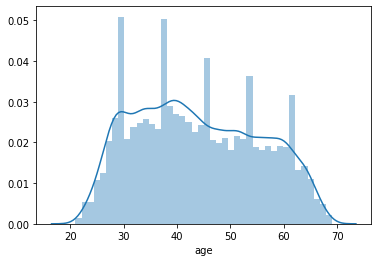

In [31]:
sns.distplot(applicant.age)

<AxesSubplot:xlabel='employed_years'>

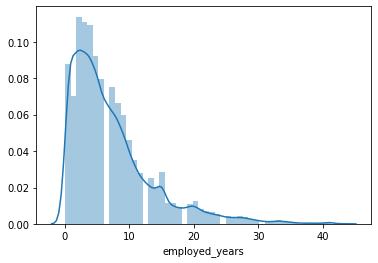

In [32]:
sns.distplot(applicant[applicant.employed_years < 100].employed_years)

In [33]:
applicant.describe().T

,count,mean,std,min,25%,50%,75%,max
id,36457.0,5.078227e+06,41875.240788,5.008804e+06,5042028.0,5074614.0,5115396.0,5150487.0
cnt_children,36457.0,4.303152e-01,0.742367,0.000000e+00,0.0,0.0,1.0,19.0
amt_income_total,36457.0,1.866857e+05,101789.226482,2.700000e+04,121500.0,157500.0,225000.0,1575000.0
days_birth,36457.0,-1.597517e+04,4200.549944,-2.515200e+04,-19438.0,-15563.0,-12462.0,-7489.0
days_employed,36457.0,5.926294e+04,137651.334859,-1.571300e+04,-3153.0,-1552.0,-408.0,365243.0
flag_mobil,36457.0,1.000000e+00,0.000000,1.000000e+00,1.0,1.0,1.0,1.0
flag_work_phone,36457.0,2.255260e-01,0.417934,0.000000e+00,0.0,0.0,0.0,1.0
flag_phone,36457.0,2.948131e-01,0.455965,0.000000e+00,0.0,0.0,1.0,1.0
flag_email,36457.0,8.972214e-02,0.285787,0.000000e+00,0.0,0.0,0.0,1.0
cnt_fam_members,36457.0,2.198453e+00,0.911686,1.000000e+00,2.0,2.0,3.0,20.0


In [50]:
# lets try to extract features like how many time a customer has delayed or cleared their payment
credit_hist.pivot(columns = 'months_balance')

id                                      ... status            \
months_balance -60 -59 -58 -57 -56 -55 -54 -53 -52 -51  ...    -9   -8   -7    
92938          NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  ...    NaN  NaN  NaN   
92939          NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  ...    NaN  NaN  NaN   
92940          NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  ...    NaN  NaN  NaN   
92941          NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  ...    NaN  NaN  NaN   
92942          NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  ...    NaN  NaN  NaN   
...             ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...    ...  ...  ...   
1048570        NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  ...    NaN  NaN  NaN   
1048571        NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  ...    NaN  NaN  NaN   
1048572        NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  ...    NaN  NaN  NaN   
1048573        NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  ...    NaN  NaN  NaN   
1048574        NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  ...    NaN  NaN  NaN   

                                                   
months_balance  -6   -5   -4   -3   -2   -1    0   
92938           NaN  NaN  NaN  NaN  NaN  NaN    C  
92939           NaN  NaN  NaN  NaN  NaN    C  NaN  
92940           NaN  NaN  NaN  NaN    C  NaN  NaN  
92941           NaN  NaN  NaN    C  NaN  NaN  NaN  
92942           NaN  NaN    C  NaN  NaN  NaN  NaN  
...             ...  ...  ...  ...  ...  ...  ...  
1048570         NaN  NaN  NaN  NaN  NaN  NaN  NaN  
1048571         NaN  NaN  NaN  NaN  NaN  NaN  NaN  
1048572         NaN  NaN  NaN  NaN  NaN  NaN  NaN  
1048573         NaN  NaN  NaN  NaN  NaN  NaN  NaN  
1048574         NaN  NaN  NaN  NaN  NaN  NaN  NaN  

[777715 rows x 122 columns]

In [138]:
application

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438552,6840104,M,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,-22717,365243,1,0,0,0,NaN,1.0
438553,6840222,F,N,N,0,103500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-15939,-3007,1,0,0,0,Laborers,1.0
438554,6841878,F,N,N,0,54000.0,Commercial associate,Higher education,Single / not married,With parents,-8169,-372,1,1,0,0,Sales staff,1.0
438555,6842765,F,N,Y,0,72000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-21673,365243,1,0,0,0,NaN,2.0


In [153]:
# so lets get a dataframe that holds all of the observation that are unique in all of the features

non_dup_app = application[application.duplicated(subset =['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS'] ) == False]

In [193]:
non_dup_app

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
7,5008812,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,1,0,0,0,NaN,1.0
10,5008815,M,Y,Y,0,270000.0,Working,Higher education,Married,House / apartment,-16872,-769,1,1,1,1,Accountants,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438541,6837707,M,N,Y,0,202500.0,Working,Higher education,Civil marriage,House / apartment,-13510,-2309,1,1,0,0,Laborers,2.0
438545,6839651,F,N,Y,3,99000.0,Pensioner,Secondary / secondary special,Single / not married,House / apartment,-18832,365243,1,0,0,0,NaN,1.0
438547,6839917,F,N,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-10966,-2704,1,0,0,0,NaN,2.0
438552,6840104,M,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,-22717,365243,1,0,0,0,NaN,1.0


In [154]:
# Extracting the unique id from the above data frame and the credit dataframe

unique_application_id = list(non_dup_app.ID.unique())
unique_credit_id = list(credit.ID.unique())

In [155]:
# here we are checking if the unique id in our application data frame is in the list of unique credit id list
# and creating a new list that holds IDs that are both in non duplicated dataframe and the credit id

# appication_and_credit = []
# just_application= []
# for val in unique_application_id:
#     if val in unique_credit_id:
#         appication_and_credit.append(val)
#     else:
#         just_application.append(val)

In [156]:
# and now we are creating an application dataframe using the list of IDs that have both application and credit hist


# df = pd.DataFrame(columns = application.columns)
# for val in appication_and_credit:
#     df = df.append(application[application.ID == val])


In [162]:
# saving the dataframe locally

# df.to_csv('app.csv')

In [163]:
# and now we are creating an credit dataframe using the list of IDs that have both application and credit hist


# df = pd.DataFrame(columns = credit.columns)
# for val in appication_and_credit:
#     df = df.append(credit[credit.ID == val])

In [165]:
# saving the data locally

# df.to_csv('cred.csv')

**Now I want to create a list or maybe a dictionary to create a spearate group of the IDs from our initial application data frame that shared the same value for all of the other variables**

In [173]:
duplicated_ids = list(application[application.duplicated(subset =['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS'] )].ID)

In [176]:
dup_df = application[application.duplicated(subset =['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS'] )]

In [192]:
dup_df

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
5,5008810,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
6,5008811,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
8,5008813,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,1,0,0,0,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438550,6840100,F,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,-22717,365243,1,0,0,0,NaN,1.0
438551,6840102,F,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,-22717,365243,1,0,0,0,NaN,1.0
438554,6841878,F,N,N,0,54000.0,Commercial associate,Higher education,Single / not married,With parents,-8169,-372,1,1,0,0,Sales staff,1.0
438555,6842765,F,N,Y,0,72000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-21673,365243,1,0,0,0,NaN,2.0


In [ ]:
for i in duplicated_ids:
    if application
    

In [195]:
application[application.duplicated(subset = ['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS'], keep = False)]

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
5,5008810,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438550,6840100,F,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,-22717,365243,1,0,0,0,NaN,1.0
438551,6840102,F,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,-22717,365243,1,0,0,0,NaN,1.0
438554,6841878,F,N,N,0,54000.0,Commercial associate,Higher education,Single / not married,With parents,-8169,-372,1,1,0,0,Sales staff,1.0
438555,6842765,F,N,Y,0,72000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-21673,365243,1,0,0,0,NaN,2.0
